<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW2_RQudsi/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from numpy import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content


In [5]:
!pwd

/content


In [6]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [7]:
ls kaggle*

kaggle.json


In [8]:
!chmod 600 kaggle.json

import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '20', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [9]:
cd Studies/Spring_2020/PHYS_667/data/HW2/

/content/gdrive/My Drive/Studies/Spring_2020/PHYS_667/data/HW2


In [10]:
!kaggle datasets list -s price-volume-data

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
neuromusic/avocado-prices                                 Avocado Prices                                     629KB  2018-06-06 05:28:35          51804  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                          492MB  2017-11-16 14:53:29          49496  
mczielinski/bitcoin-historical-data                       Bitcoin Historical Data                            125MB  2019-08-15 14:31:32          55678  
utathya/future-volume-prediction                          Volume Forecasting                                 531KB  2018-02-26 18:01:35            908  
sudalairajkumar/cryptocurrencypricehistory                Cryptocurrency Historica

In [11]:
 !kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [13]:
from glob import glob

fnames = sort( glob( 'Data/Stocks/*.txt') )
#fnames = glob( 'Data/ETFs/*.txt')
print( 'Total %s relevant files found' %(len(fnames)))

Total 7195 relevant files found


In [14]:
fnames[0:10]

array(['Data/Stocks/a.us.txt', 'Data/Stocks/aa.us.txt',
       'Data/Stocks/aaap.us.txt', 'Data/Stocks/aaba.us.txt',
       'Data/Stocks/aac.us.txt', 'Data/Stocks/aal.us.txt',
       'Data/Stocks/aamc.us.txt', 'Data/Stocks/aame.us.txt',
       'Data/Stocks/aan.us.txt', 'Data/Stocks/aaoi.us.txt'], dtype='<U28')

In [16]:
df_f = pd.DataFrame()
ind=10
for (f,i) in zip( fnames[0:ind], range(ind) ) :

    df = None
    df = pd.read_csv(f)

    ndf = pd.DataFrame({f[12:-4]:df.Close, 'Date':df.Date})
    if(shape(df_f)==(0,0)):
        df_f = ndf.copy()
    else :
        df_f = df_f.merge(ndf, on=['Date', 'Date'])#, suffixes=('', '_'+f[12:-4]))

df_f.set_index("Date", inplace=True)
print(df_f.columns)

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')


In [17]:
for i in range(10):
    print(fnames[i][12:-4])

a.us
aa.us
aaap.us
aaba.us
aac.us
aal.us
aamc.us
aame.us
aan.us
aaoi.us


In [18]:
'''
count=0
for col in sort(df_f.columns) :

    df_f.rename(columns={col:fnames[count][12:-4]}, inplace=True)
    print(fnames[count][12:-4])
    count+=1
'''
df_f.columns

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')

In [19]:
print ("shape of the dataset:", df_f.shape)

shape of the dataset: (447, 10)


<font color=red>The next three lines install the latex dependencies of matplotlib so that texts and labels are rendered in the format I want. It takes a bit of time to run those. The work around would be to comment the next two blocks of code and then run the notebook for fast rendering.</font>

In [20]:
#! sudo apt-get install texlive-latex-recommended 
#! sudo apt install texlive-latex-extra
#! sudo apt install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [0]:
# Set the fontstyle to Times New Roman

font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=True)

#  data inspection

plot each time series (ts)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


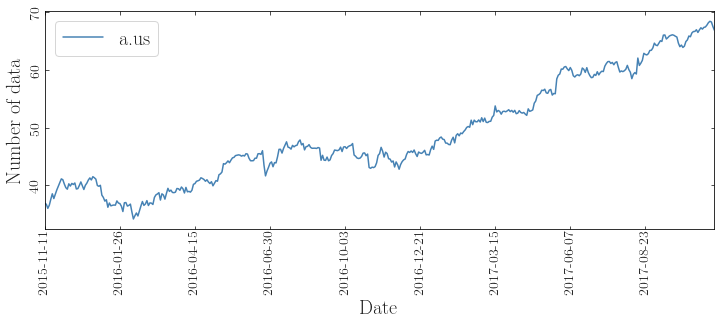

In [22]:
for c in df_f.columns[0:1]:
    fig, ax = pl.subplots(figsize=(12,4))
    #pl.figure(figsize=(10,3))
    df_f.plot(y=c, ax=ax, rot=45, label=c[-7:])
    pl.tick_params(which='major', rotation=90, labelsize=14)
    pl.legend(fontsize=20)
    pl.xlabel('Date', fontsize=20)
    pl.ylabel('Number of data', fontsize=20)

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

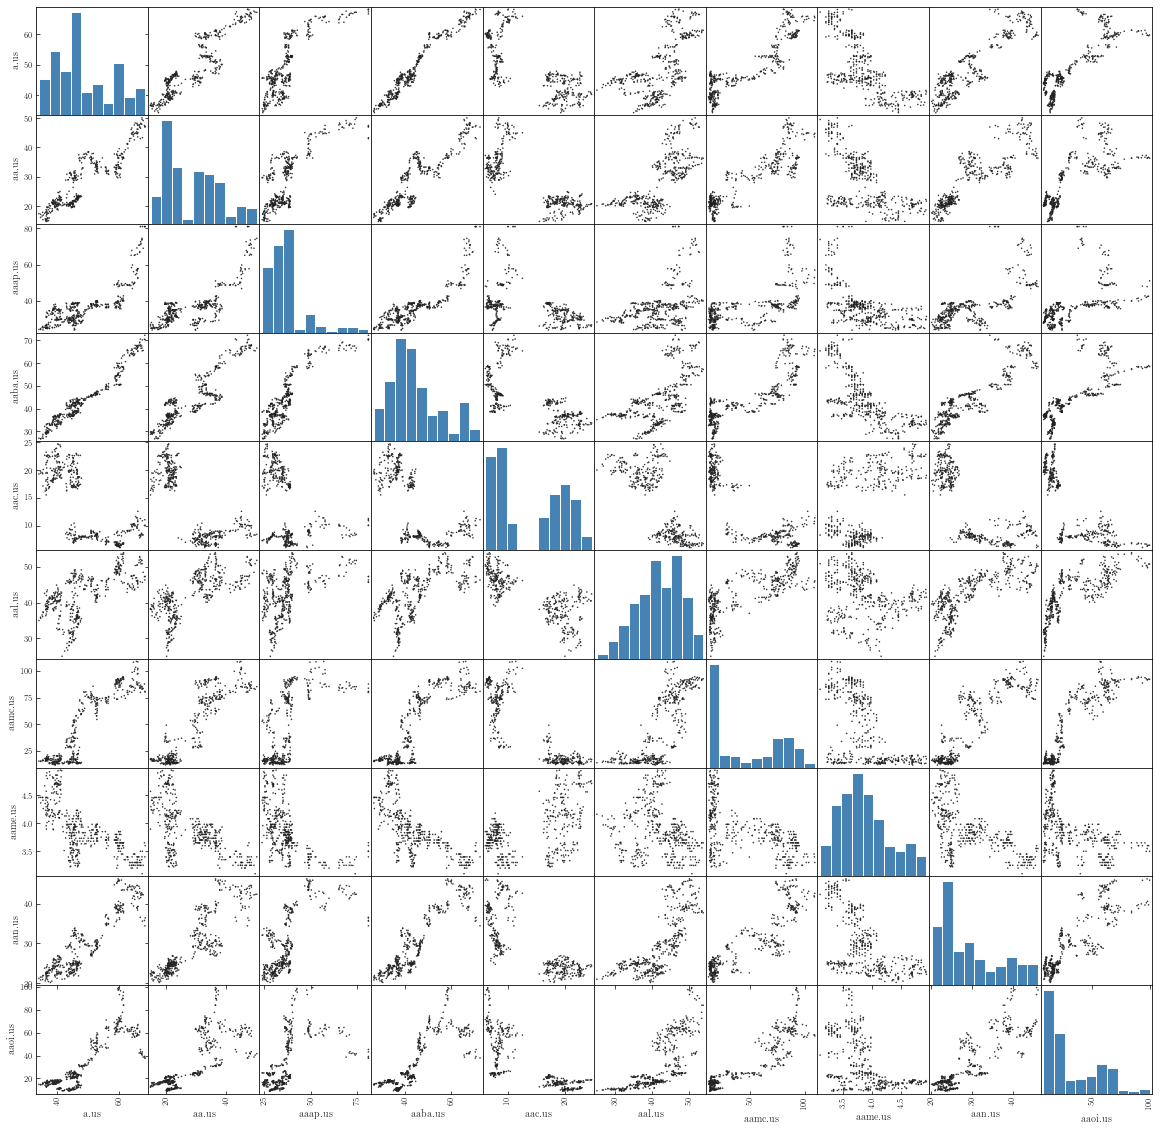

In [23]:
from pandas.plotting import scatter_matrix
#ax, fig = pl.subplots(1, figsize=(20,20))
#print(ax, fig)
scatter_matrix(df_f, color="#222222", marker='.', s=10, alpha=0.9, diagonal='hist', figsize=(20,20))
!

In [25]:
#pl.savefig("../../figures/df_f_hist.pdf", dpi=500, format='pdf')

<Figure size 720x432 with 0 Axes>

In [24]:
!pwd

/content/gdrive/My Drive/Studies/Spring_2020/PHYS_667/data/HW2


In [25]:
df_f.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


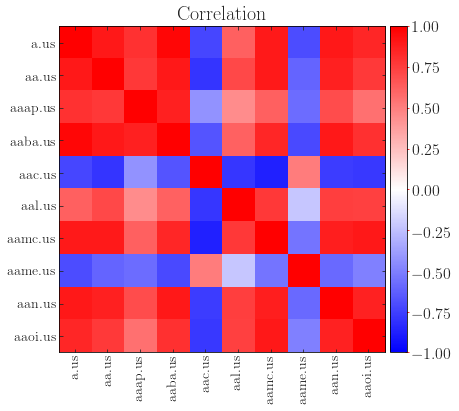

In [124]:
# Used a different colorbar since it is easier to see all three conditions, aka
# 1. High correlation
# 2. High anti-correlation
# 3. Almost no correlation

pl.imshow(df_f.corr(), norm=matplotlib.colors.Normalize(vmin=-1, vmax=1), cmap=matplotlib.pyplot.cm.bwr)
pl.colorbar(pad=0.01).ax.tick_params(labelsize=16, direction='inout', color='r')
pl.title("correlation")
pl.xticks(range(len(df_f.columns)), df_f.columns, rotation=90)
pl.yticks(range(len(df_f.columns)), df_f.columns)
pl.tick_params(which='both', direction='in', labelsize=14)
pl.title( 'Correlation', fontsize=20);

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

Compute the p-values for each time series by the unit root test using the adfuller model of statsmodels package, which gives the value based on Augmented Dickey-Fuller method.

In [32]:
# Define the threshold p-value
threshold = 0.05
p_values = {}

#Compute the p value for each column, and display if it is stationary

for col in df_f.columns[:10]:
    p_values[col] = sm.tsa.stattools.adfuller(df_f[col])[1]
    print(col, "is stationary:", p_values[col] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


In [33]:
p_values

{'a.us': 0.9711053061077951,
 'aa.us': 0.8615583755460212,
 'aaap.us': 0.9990837483738163,
 'aaba.us': 0.9976818114588439,
 'aac.us': 0.4980216243419859,
 'aal.us': 0.5075488991307308,
 'aamc.us': 0.8176042911117105,
 'aame.us': 0.0395562412801309,
 'aan.us': 0.7303922201105058,
 'aaoi.us': 0.6114808797718178}

## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

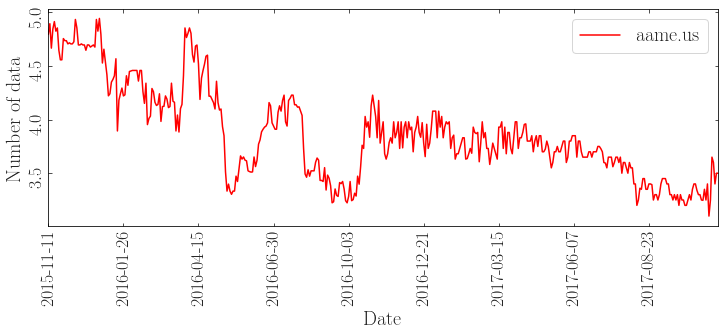

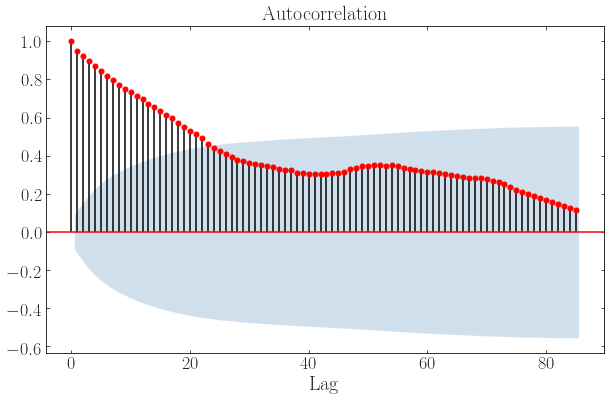

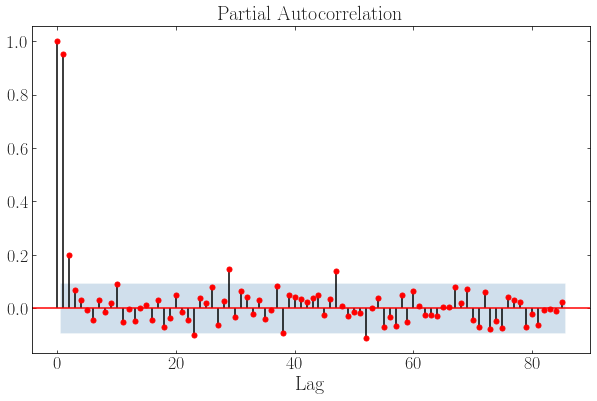

In [36]:
for col in df_f.columns[7:8] :
    if(p_values[col] < threshold) :
        color='r'
    else :
        color='b'

    fig, ax = pl.subplots(figsize=(12,4))
    df_f.plot(y=col, ax=ax, color=color, rot=45, label=col)
    pl.tick_params(which='major', rotation=90, labelsize=18)
    pl.legend(fontsize=20)
    pl.xlabel('Date', fontsize=20)
    pl.ylabel('Number of data', fontsize=20)

    fig = sm.graphics.tsa.plot_acf(df_f[col], color=color, lags=85)
    pl.tick_params(which='major', rotation=0, labelsize=18)
    pl.xlabel('Lag', fontsize=20)
    pl.title('Autocorrelation', fontsize=20)

    fig = sm.graphics.tsa.plot_pacf(df_f[col], color=color, lags=85)
    pl.tick_params(which='major', rotation=0, labelsize=18)
    pl.xlabel('Lag', fontsize=20)
    pl.title('Partial Autocorrelation', fontsize=20)

In [0]:
pl.close('all')

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
aic_aame = zeros((4,4))
aic_aame[:] = NaN
# find the list of keys for which threshold is satisfied, aka which comumns are stationary

#n_key = []

#for keys in p_values.keys():
#    if( p_values[keys] < threshold) :
#        n_key.append(keys)
#print(n_key)

#for col in n_key :
#    'aic_' + col = zeros((5,5))
#    'aic_' +col[:] = NaN
for i in range(4) :
    for j in range(4) :
        aic_aame[i,j] = sm.tsa.ARMA(df_f[['aame.us']], (i,j)).fit(disp=False).aic


In [82]:
print("best parameters: \n p = %s \n q = %s" %(np.where(aic_aame == nanmin(aic_aame))[0][0], np.where(aic_aame == nanmin(aic_aame))[1][0]) )

best parameters: 
 p = 1 
 q = 1


In [0]:
x_ind = np.where(aic_aame == nanmin(aic_aame))[0][0]
y_ind = np.where(aic_aame == nanmin(aic_aame))[1][0]

In [84]:
print( nanmin(aic_aame) )
#where(aic_aame == nanmin(aic_aame))
aic_aame[x_ind,y_ind], aic_aame[1,1], aic_aame[2,3]

-594.1149218798437


(-594.1149218798437, -594.1149218798437, -588.4783451985861)

<font color=magenta>**sm.tsa.ARMA(dataframe, ARMA(p,q)).fit(disp, trend)**:<font color=black>Fits ARMA(p,q) model using exact maximum likelihood via Kalman filter.</font>

In [107]:
#example of model output
arma_mod_11_c = sm.tsa.ARMA(df_f[['aame.us']], (1,1)).fit(disp=False, trend='c')
arma_mod_11_nc = sm.tsa.ARMA(df_f[['aame.us']], (1,1)).fit(disp=False, trend='nc')
#print(arma_mod_11.params)
#(df_f[col], (3,1), dates=df_f.index ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
print(arma_mod_11_c.summary())
print(arma_mod_11_nc.summary())

                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Mon, 24 Feb 2020   AIC                           -594.115
Time:                        22:42:57   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
sm.tsa.ARMA?

## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


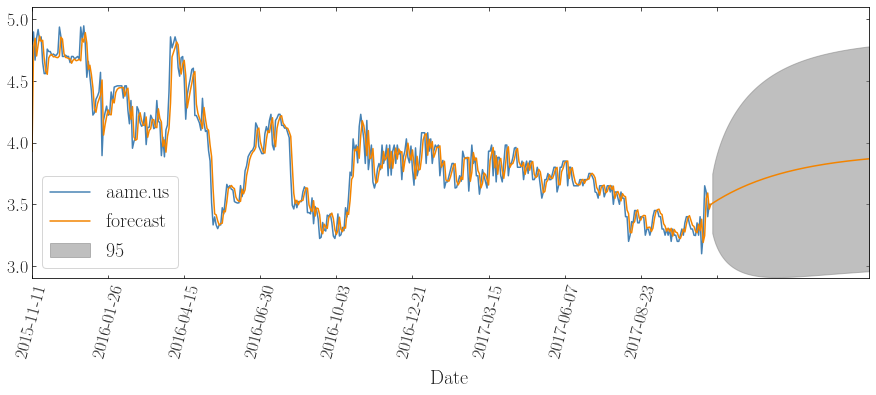

In [109]:
ax = df_f[['aame.us']].plot(figsize=(15,5))
arma_mod_11_c.plot_predict(end=550, plot_insample=False, ax=ax);
pl.ylim(2.9, 5.1)
pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


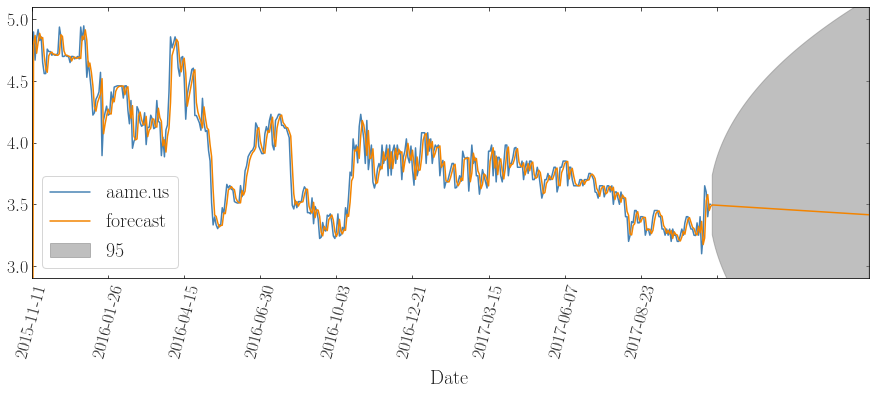

In [110]:
# Plotting without contant
ax = df_f[['aame.us']].plot(figsize=(15,5))
arma_mod_11_nc.plot_predict(end=550, plot_insample=False, ax=ax);
pl.ylim(2.9, 5.1)
pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

# 3.5 what are the coefficients of the best fit model? what do they mean? 


<font color=blue> Coefficients of the best fit models are:

<font color=black> constant = 3.9375

Auto Regressive (L1) = 0.9811

Moving Average (L1) = -0.2706

Since it is a (1,1) ARMA model, the model equation can be written as:

$y(t) = \mu + \epsilon_t + a_1 y(t-1) + \theta_1 \epsilon_{t-1}$

where $\mu$ is the contant, $a_1$ is the coefficient corresponding to the coefficinet of auto regressive part of the model and $\theta_1$ corresponds to coeeficient of moving average part.

**<font color=magenta> What do they mean?**

#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [153]:
# Find the column names for which the correlation value is least.
## Make sure to exclude the columns which are stationary

dfn = df_f.drop(columns='aame.us')

x_ind = where( abs(dfn.corr()) == min( abs(dfn.corr()).min() ))[0][0]
y_ind = where( abs(dfn.corr()) == min( abs(dfn.corr()).min() ))[0][1]

col1 = dfn.columns[x_ind]
col2 = dfn.columns[y_ind]
print( col1, col2)

aaap.us aac.us


In [144]:
abs(df_f.corr())

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,0.721867,0.621041,0.897263,0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,0.791137,0.713229,0.893952,0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,0.423021,0.451520,0.621329,0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,0.670578,0.612989,0.849972,0.709023,0.903785,0.809059
aac.us,0.721867,0.791137,0.423021,0.670578,1.000000,0.785248,0.868936,0.510986,0.765267,0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,0.785248,1.000000,0.780517,0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,0.868936,0.780517,1.000000,0.544740,0.881631,0.904166
aame.us,0.699609,0.606774,0.573976,0.709023,0.510986,0.219258,0.544740,1.000000,0.585002,0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,0.765267,0.756808,0.881631,0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,0.780147,0.746505,0.904166,0.496371,0.860847,1.000000


In [100]:
arma_mod_11_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Mon, 24 Feb 2020   AIC                           -594.115
Time:                        22:35:11   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
arma_mod_11_c.params

const            3.927505
ar.L1.aame.us    0.981141
ma.L1.aame.us   -0.270580
dtype: float64

In [0]:
...

Ellipsis

In [0]:
np.where(aics[0] == np.nanmin(aics[0])), np.where(aics[1] == np.nanmin(aics[1]))

((array([2]), array([3])), (array([4]), array([3])))

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/fbb/ana

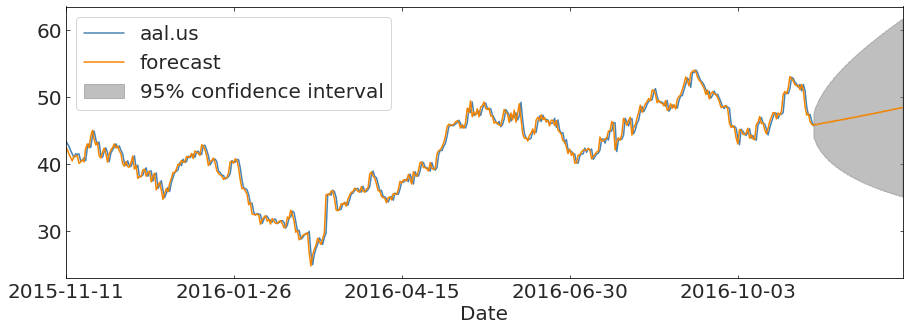

In [0]:
ax = tss[lcs[0]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[0]], (np.where(aics[0] == np.nanmin(aics[0]))[0][0], 2,  
                                 np.where(aics[0] == np.nanmin(aics[0]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  Va

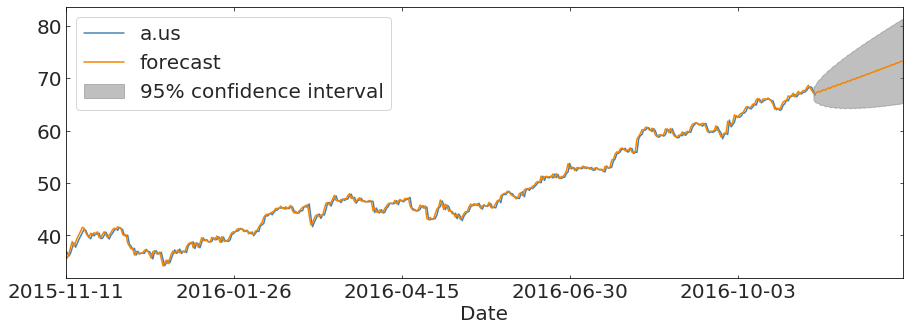

In [0]:
ax = tss[lcs[1]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[1]], (np.where(aics[1] == np.nanmin(aics[1]))[0][0], 2,  
                                 np.where(aics[1] == np.nanmin(aics[1]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?